Importando o banco de dados MNIST
-------

In [1]:
import numpy as np

In [2]:
%%time
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

CPU times: user 29.9 s, sys: 815 ms, total: 30.7 s
Wall time: 45.8 s


In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

Pegando o vetor da caracter√≠stica de uma inst√¢ncia, remodel√°-lo em uma array 28 x 28 e exibi-lo usando a fun√ß√£o "imshow()"

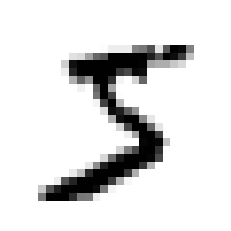

CPU times: user 63.2 ms, sys: 4.01 ms, total: 67.2 ms
Wall time: 80.1 ms


In [5]:
%%time
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [6]:
y[0]

'5'

-----
* Resolvendo problemas


Fun√ß√£o para conseguir plotar as imagens do banco de dados e as matrizes de entrada tenso o mesmo numero de dimens√µes:

In [103]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

Aqui, a fun√ß√£o √© feita para conseguir plota as imagens do banco de dados na etapa de An√°lis de Erro com as dimens√µes corretas para funcionar perfeitamente:

* ***Obs: essas duas fun√ß√µes foi colocada ao pesquisar sobre os erros que foi aparecendo durante o projeto e com a ajuda de membros do Github e do stackoverflow.***

In [93]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    
    images_per_row = min(len(instances), images_per_row)

    n_rows = (len(instances) - 1) // images_per_row + 1

    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

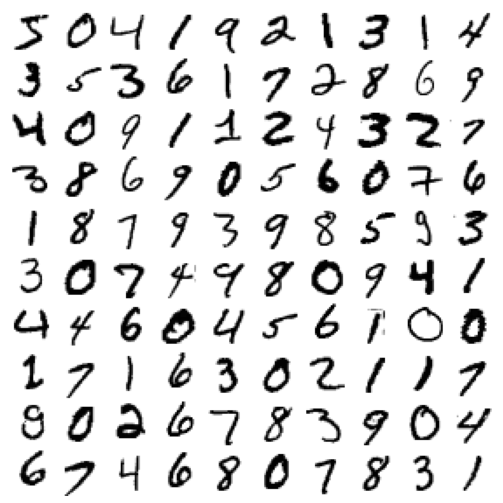

In [8]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

-------

Convertendo Y para inteiro.

In [9]:
y = y.astype(np.uint8)

* Criando um conjunto de teste e seprando antes de especionar os dados:

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[:60000], y[:60000], y[:60000]

Treinando um Classificador Bin√°rio.
---------------------------





In [11]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Usando o Classificador SGDClassifier - Gradiente Descendente estoc√°stico - da Scikit-Learn.


* O SGDClassifier depende da aleatoriedade durante o treinamento.
* Os par√¢metros do random_state podem ser difinidos para ter resultados que possam ser reproduzidos.


In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [13]:
sgd_clf.predict([some_digit])

array([ True])

C√°culo de Desempenho.
---------------------



Calculando a acur√°cia com a valida√ß√£o cruzada:

.Implementando a Valida√ß√£o Cruzada

In [14]:

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone


skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))


0.9669
0.91625
0.96785


Avaliando o modelo SGDClassifier com a fun√ß√£o cross_val_score() com o metodo do K-fold:



*   Aqui acur√°cia foi acima de 93%, informando que a propor√ß√£o de predi√ß√µes √© correta.






In [15]:

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

------------------------------------------
- Um classificar que deixa a desejar (para fins didaticos).

In [16]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)    

Estimando a acur√°cia desse modelo:

In [17]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

uma demostra√ß√£o do por que geralmente a acur√°cia n√£o √© a medida de desempenho preferida para os classificadores, sobre tudo quando voc√™ estiver enfrentando um banco de dados assim√™tricos.

-----------------------------

Matrix de Confus√£o
-----------

Pode-se realizar predi√ß√µes sobre o conjunto de testes, mas ser√° feito em outro momento, enquanto isso ser√° usado a fun√ß√£o cross_val_predict(), assim: 


*   Realizando o m√©todo K-fold de valida√ß√£o cruzada com a fun√ß√£o cross_val_predict(), ela retorna as predi√ß√µes feitas em cada teste de fold.

* Significa que voc√™ ter√° uma predi√ß√£o "limpa" (quando uma predi√ß√£o √© feita por um modelo que nunca manipulou os dados durante o treinamento).



In [18]:
%%time
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)



CPU times: user 35.3 s, sys: 243 ms, total: 35.5 s
Wall time: 35 s


Agora, obtendo a matriz de confus√£o usando a fun√ß√£o confusion_matrix() passando as classes-alvo y_train_5 e as classes previstas y_train_pred.

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

* Na primeira linha desta matriz considera imagens n√£o-5 (classe negativa): 53892 delas foram classificadas corretamente como n√£o-5 (o famoso verdadeiros negativos), j√° as 687 restantes foram falsos positivos.

* Na segunda linha considera as imagens dos 5s (classe positiva): 1891 foram classificados como falso negativo, o restante dos 3530 foram classificados perfeitamente como verdadeiros positivos.

-Lembrando que um classificador perfeito teria somente verdadeiros positivos e verdadeiros negativos, no caso a sua matriz de confus√£o teria valores diferentes de zera apenas em sua diagonal principal, como segue no exemplo abaixo:

In [20]:
y_train_perfect_predition = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predition)

array([[54579,     0],
       [    0,  5421]])

Precis√£o e Renova√ß√£o 
--------

In [21]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) # == 3530 / (3530+687)

0.8370879772350012

* 83,70%

In [22]:
recall_score(y_train_5, y_train_pred)  # == 3530 / (3530+1891)

0.6511713705958311

* 65,11%

Acima mostra que o detector n√£o parece t√£o bom como quando foi analisado anteriormente. 



*   Calculando o F1 score com a fun√ß√£o f1_score:



In [23]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

* 73,25%

Trade-off precis√£o/revoca√ß√£o
------

chamando o metodo decision_function(), onde retorna um score para cada inst√¢ncia e, em seguida faz as predi√ß√µes com base nesses scores usando qualquer linha limiar desejad:

In [24]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [25]:
threshold = 0

In [26]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

Aumentando o limiar do SGDClassifier:

In [27]:
threshold = 8000

In [28]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

Ao aumentar o limiar, diminui a revoca√ß√£o. o Classificador detecta quando o limiar √© 0, mas o perde quando o limiar sobe at√© 8 mil.

* Agora sera usado a fun√ß√£o cross_val_predict() para obter os scores de todas as inst√¢ncias no conjunto de treinamento.

In [29]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

* Calculando a precis√£o e a revoca√ß√£o de todos os limiares possiveis com a fun√ß√£o precision_recall_curve:

In [30]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train_5, y_scores)

* Plotando um grafico mostrando a precis√£o e a revoca√ß√£o:

Um detalhe, o codigo do livro estava errado, aqui em baixo segue a vers√£o corrigida.

In [31]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):

    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])             

In [32]:
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = threshold[np.argmax(precisions >= 0.90)]

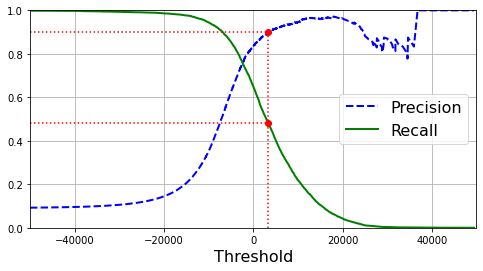

In [33]:
plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, threshold)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                                                                      
plt.show()

In [34]:
(y_train_pred == (y_scores > 0)).all()

True

* Plotando um grafico com a precis√£o diretamente em rela√ß√£o √° revoca√ß√£o:

In [35]:
def plot_precision_recall(precision, recalls):
  plt.plot(recalls, precisions, "b-", linewidth=2)
  plt.xlabel("Revoca√ß√£o", fontsize=13)
  plt.ylabel("Precis√£o", fontsize=13)
  plt.axis([0, 1, 0, 1])
  plt.grid(True)


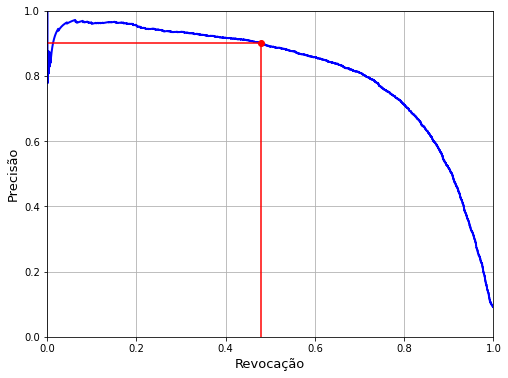

In [36]:
plt.figure(figsize=(8, 6))
plot_precision_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0.,0.9], "r")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()  

* Procurando o limiar mais baixo que forne√ßa pelo menos 90% de precis√£o usando o
np.argmax().

In [37]:
threshold_90_precision = threshold[np.argmax(precisions >= 0.90)]

* Para fazer predi√ß√µes em vez de chamar o metodo predict(), estou usando esse c√≥dico abaixo:

In [38]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

* conferindo a precis√£o e a revoca√ß√£o dessas predi√ß√µes

att. isso mostra que tenho um classificador com 90%!

In [39]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [40]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

 *Curva* ROC
---

* Antes de plotar a curva ROC, irie usar a fun√ß√£o roc_curve() a fim de calcular a TPR e o FPR para varios valores de limiares.

In [41]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

* Agora uma fun√ß√£o para plota FPR em rela√ß√£o ao TPR usando o matplotlib (por enquanto rsrs)

In [42]:
from sklearn.metrics._plot.roc_curve import plot_roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])                                
    plt.xlabel('Taxa de falsos positivos (Fall-Out)', fontsize=16)
    plt.ylabel('Taxa de Verdadeiro Positivo (Recall)', fontsize=16)
    plt.grid(True)     

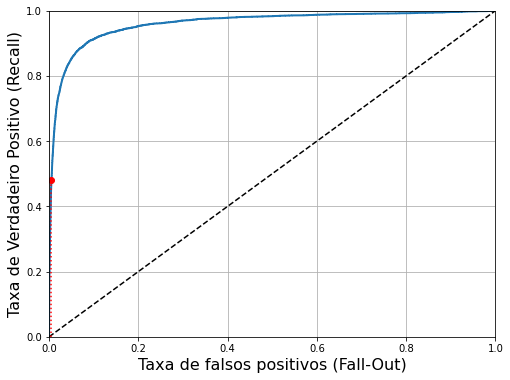

In [43]:
plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
plt.plot([fpr_90], [recall_90_precision], "ro")                                                   
plt.show()

* Calculando o ROC AUC:

In [44]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

* Treinando um RandomForestClassifier e comparar o SGDClassifier.

In [45]:
%%time
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

CPU times: user 1min 23s, sys: 265 ms, total: 1min 24s
Wall time: 1min 23s


* Usando a probabilidade da classe positiva como a score:

In [46]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

* Plotando a Curva ROC do RandomForestClassifier:

In [47]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

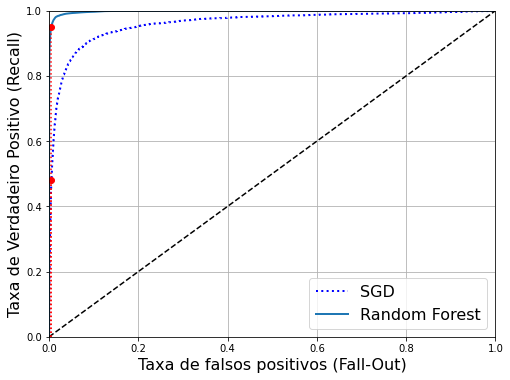

In [48]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

* A curva ROC do RandomForestClassifier se demonstrou melhor que a do SGDClassifier, ficando mais proximo de 1.

* Mostrando logo em seguida o valor do score:

In [49]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

- o valor do score foi de 99,83%, assim podemos dizer que foi quase perfeito o seu desempenho üòØ. 

Classifica√ß√£o Multiclasse
----

Para iniciar essa etapa, eu irei usar o algoritimo SVC (Support Vector Classification):

* Esse c√≥digo treina o svc no conjunto de treinamento usando as classes alvos originais de 0 a 9 (y_rain) em vez das classes alvos 5 versus the rest (y_train_5):


**Aten√ß√£o: O c√≥digo abaixo demorou mais de 2 horas para ser executado, por isso foi colocar "X_train[:1000], y_train[:1000]", para limitar a leitura apenas para as primeiras 1000 linhas.**

**Motivo: n√£o tenho um hardware potente para ler esse banco de dados, mesmo ele sendo bem b√°sico.**



In [50]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000])
svm_clf.predict([some_digit])

array([5], dtype=uint8)

* Logo abaixo √© usado o decision_function para retorna 10 scores por inst√¢ncias, sendo um score por classe:

Nota importante de aprendizado: Quando um classificador √© treinado, ele armazena a lista de classes alvos no atributo classes_, ordenado por valor.

Abaixo eu fa√ßo uma visualiza√ß√£o do √≠ndice de cada classe:

In [51]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [52]:
np.argmax(some_digit_scores)

5

In [53]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [54]:
svm_clf.classes_[5]

5

-----------

Para fins didaticos, o scikit-Learn ser√° for√ßado a usar a estrat√©gia "one versus one" ou "one versus the rest" com as classes OneVsOneClassifier ou OneVsRestClassifier:

ps: cuidado, esses c√≥digos pode demora minutos ou at√© horas para rodar dependendo do seu hardwae.

In [55]:
from  sklearn.multiclass import OneVsOneClassifier

ovr_clf = OneVsOneClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [56]:
len(ovr_clf.estimators_)

45



---



Classificando diretamente as inst√¢ncias em v√°rias classes com o SGD.

In [57]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

* O mesmo que anteriormente, a fun√ß√£o decision_function() retorna um valor por classe, assim podendo visualizar o score que o classificador SGD atribuiu a cada classe:

In [58]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

* Avaliando o classificador SGD, usando a valida√ß√£o cruzada com a fun√ß√£o cross_val_score() para avaliar a accuracy:

In [59]:
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

* Aqui o score foi de 87,36%, porem ainda ainda tem como melhorar.

* Fazendo o escalonamento das entradas para aumentar a acur√°cia acima de 89%, ou ao menos tentar:

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

* O score ficou entorno de 89,83%.

# An√°lise de Erro

Analisando a Matriz de confus√£o:

In [61]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

* Plotando o grafico para melhor visualiza√ß√£o:

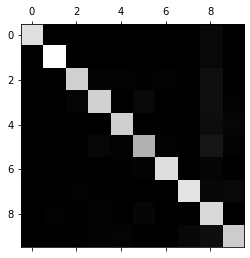

In [62]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

-------
* **apenas plotando um gr√°fico interativo da mtrix de confus√£o para melhor entendimento da explica√ß√£o que vem a seguir**

In [63]:
import plotly.express as px

fig = px.imshow(conf_mx, text_auto=True)
fig.show()

------

* Representa√ß√£o dos erros, dividindo cada valor da matrix de confus√£o pelo n√∫mero de imagens na classe correspondente de modo que consiga comparar as taxas de erros, em vez n√∫meros absolutos de erros:

In [64]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

* Agora preenchendo a diagonal com zeros para manter os erros e mostrar os resultados:

> Aqui serve para olhar de forma clara os tipos de erros que o classificador comete.






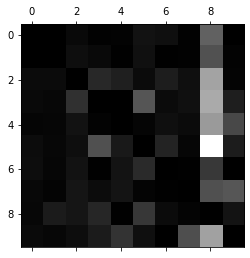

In [65]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

* Visualizando os valores em um grafico interativo:

In [66]:
fig = px.imshow(norm_conf_mx, text_auto=True)
fig.show()

* Plotando os exemplos 3 e 5, onde mostrado no plot anterior, √© onde geralmente fica confuso no classificador (n√£o √© classificado de forma correta e o classificador fica confuso ao identificar as imagens):

Nota: como 3 e 5 se diferem apenas em alguns pixels, esse modelo facilmente se confunde, o motivo √© por conta do uso do SGDClassifier simples, que √© um modelo linear. 

* **Se voc√™ desenhar um 3 com a jun√ß√£o levemente deslocada √° esquerda, o classificador poder√° classific√°-lo como 5 e por ai vai.**

In [67]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]


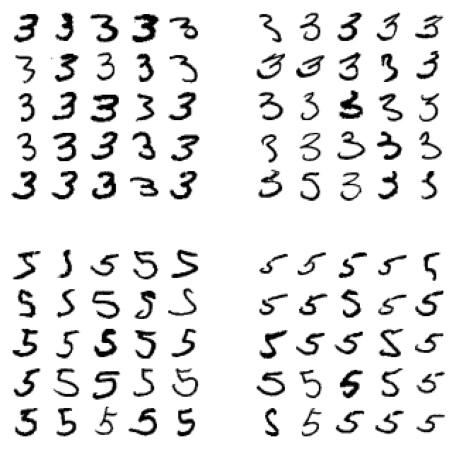

In [68]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

* Para poder ajudar a resolver problemas como esse, √© pr√©-processando as imagens para assegurar que estejam bem centralizadas, assim envitando confus√µes em um classificador simples que funciona de forma linear.

# Classifica√ß√£o Multirr√≥tulo

Criando uma array y_multilabel contendo dois r√≥tulos=-alvos para cada imagem de algarismo:

* O primeiro indica se o algarismo √© maior ou igual a 7, ou n√£o.
* O segundo √© √≠mpar ou n√£o.


In [72]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

Em seguida, a cria√ß√£o de uma inst√¢ncia KneighborsClassifier e trainando usando o array para m√∫ltiplos alvos:

In [73]:
knn_clf.predict([some_digit])

array([[False,  True]])

* Aqui mostra que o Algarismo 5 n√£o √© grande, e sim √≠mpar.

Contabilizando o F1 score em todos os r√≥tulos:

In [76]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

* Valor do F1 score, entorno de 0,9764.

* Atribuindo a cada r√≥tulo um peso igual ao seu support com o "weighted".

In [77]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

* Mostra uma pequena alta no F1 score, para o valor de 0,9778.

# Classifica√ß√£o Multioutput

Criando um sistema que remove o ru√≠do das imagens:

- A saida do classificador √© muiltrrotulada e cada r√≥tulo pode ter v√°rios valores.

* Criando um conjunto de treinamento e teste, usando as imagens do MNIST e adicionando ru√≠do √°s suas intensidades de pixel com a fun√ß√£o randint():

* As imagens alvos √© as imagens originais.

In [78]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

* Dando uma olhada em uma imgem do conjunto de testes:

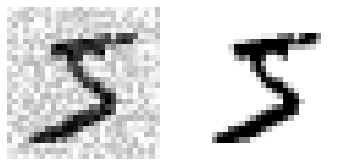

In [105]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

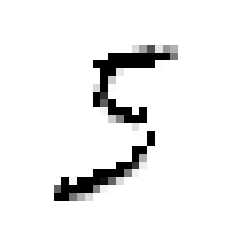

In [104]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

Parece ser algo bem proximo da imagem alvo, assim finalizando o processo de estudo e pratica da aplica√ß√£o de classifica√ß√£o com o banco de dados MNIST.

--------

# Trabalho concluido!